In [145]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import json
import glob
from scipy import stats
pd.options.display.float_format = '{:.4f}'.format

In [231]:
#sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set_palette("bright")
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
#matplotlib.style.use('ggplot')

In [365]:
def remove_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df[~((df < fence_low) | (df > fence_high)).any(axis=1)]
    return df_out

def drop_numerical_outliers(df, z_thresh):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    return (df.drop(df.index[~constrains], inplace=False))

def cdf_plot (df, col):
    data = df[col]
    data_sorted = np.sort(data)
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    fig=plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    ax.plot(data_sorted, p, linewidth=4)
    ax.set_ylabel('CDF')
    ax.set_xlabel(col)
    #xstart, xend = ax.get_xlim()
    #xstep=round((xend-xstart)/30)
    #ax.xaxis.set_ticks(np.arange(xstart, xend, xstep));
    #ystart, yend = ax.get_ylim()
    #print(ystart, yend )
    #ystep=(yend-ystart)/15
    #ax.yaxis.set_ticks(np.arange(ystart, yend, ystep));
    return(ax)

In [148]:
# read all call records
path=r"C:\Users\yakoyak\Desktop\InactivityTimer/"
all_files = glob.glob(path + "/*.txt")
df_from_each_file = (pd.read_csv(f, sep='\t') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [150]:
df.dtypes

IMSI                 float64
Start Time            object
Duration             float64
End Time              object
Start Type            object
End Type              object
Final Disposition     object
S1 Release Cause      object
dtype: object

In [151]:
#convert string to datetime
df['Start Time']=pd.to_datetime(df['Start Time'])
df['End Time']=pd.to_datetime(df['End Time'])

In [152]:
df.dtypes

IMSI                        float64
Start Time           datetime64[ns]
Duration                    float64
End Time             datetime64[ns]
Start Type                   object
End Type                     object
Final Disposition            object
S1 Release Cause             object
dtype: object

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521537 entries, 0 to 521536
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IMSI               520867 non-null  float64       
 1   Start Time         521537 non-null  datetime64[ns]
 2   Duration           521537 non-null  float64       
 3   End Time           521537 non-null  datetime64[ns]
 4   Start Type         521537 non-null  object        
 5   End Type           521537 non-null  object        
 6   Final Disposition  521537 non-null  object        
 7   S1 Release Cause   521537 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 31.8+ MB


In [154]:
df.isnull().sum()

IMSI                 670
Start Time             0
Duration               0
End Time               0
Start Type             0
End Type               0
Final Disposition      0
S1 Release Cause       0
dtype: int64

In [155]:
#remove null IMSIs
df=df.dropna(axis=0)

In [156]:
df.isnull().sum()

IMSI                 0
Start Time           0
Duration             0
End Time             0
Start Type           0
End Type             0
Final Disposition    0
S1 Release Cause     0
dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520867 entries, 0 to 521536
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IMSI               520867 non-null  float64       
 1   Start Time         520867 non-null  datetime64[ns]
 2   Duration           520867 non-null  float64       
 3   End Time           520867 non-null  datetime64[ns]
 4   Start Type         520867 non-null  object        
 5   End Type           520867 non-null  object        
 6   Final Disposition  520867 non-null  object        
 7   S1 Release Cause   520867 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 35.8+ MB


In [158]:
df.Duration.describe()

count   520867.0000
mean        18.4182
std        151.6442
min          5.0820
25%          6.5820
50%          7.2990
75%         11.0470
max      49778.6110
Name: Duration, dtype: float64

In [289]:
def plot_density_hist(df, num_cols, bins = 10, hist = False):
    for col in num_cols:
        fig = plt.figure(figsize=(12,8))
        ax = fig.add_subplot()
        #sns.set_style("whitegrid")
        sns.distplot(df[col], bins = bins, rug=False, kde=True, hist = False, ax=ax, 
                     kde_kws={"lw": 4, "alpha": 1, "color": "b"})
        ######
        ax2=ax.twinx()
        #ax2.spines['right'].set_position(('outward', 40)) 
        sns.distplot(df[col], bins = bins, rug=False, kde=False, hist = True, ax=ax2, 
                     hist_kws={'histtype': 'bar',"alpha": 0.7, "color": "b"})
        plt.title('Hist and Density of ' + col) # Give the plot a main title
        ax.set_ylabel('PDF')
        ax2.set_ylabel('Hist Count')

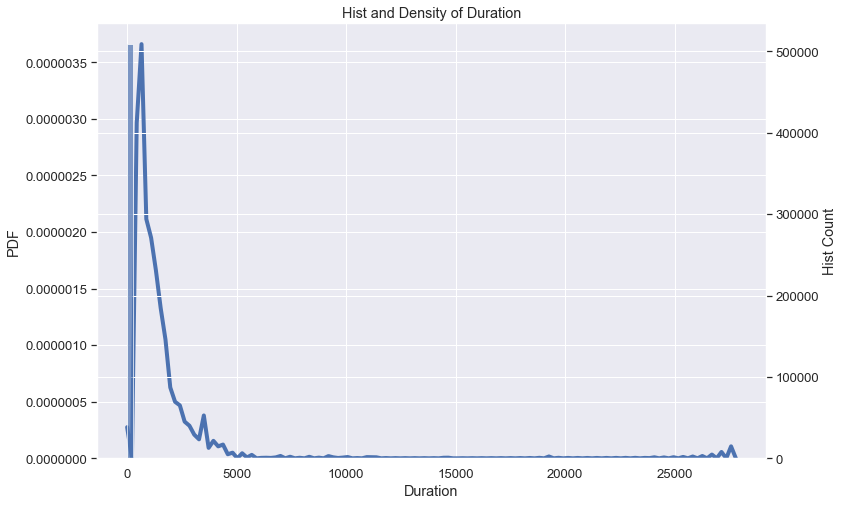

In [287]:
num_cols = [ 'Duration']       
plot_density_hist(df, num_cols, bins = 100, hist = True)  

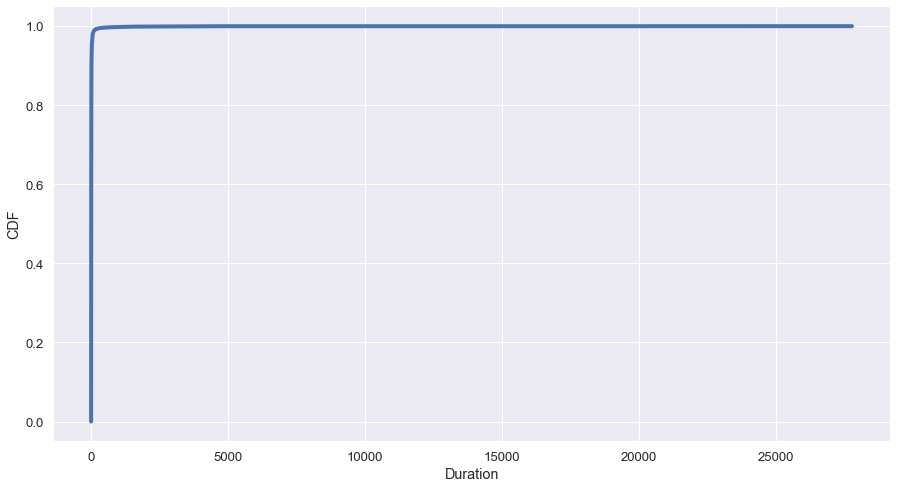

In [366]:
#plt.figure(figsize=(14,8))
#df.Duration.hist( cumulative = True,density=True, bins=1000, histtype='step', linewidth=4 )
ax=cdf_plot(df, 'Duration')

In [378]:
#remove outlier
#df_dur_clean=remove_outlier(df[['Duration']])
#df_dur_clean2=drop_numerical_outliers(df[['Duration']],z_thresh=0.25)
df_dur_clean=df[df['Duration']<=70]

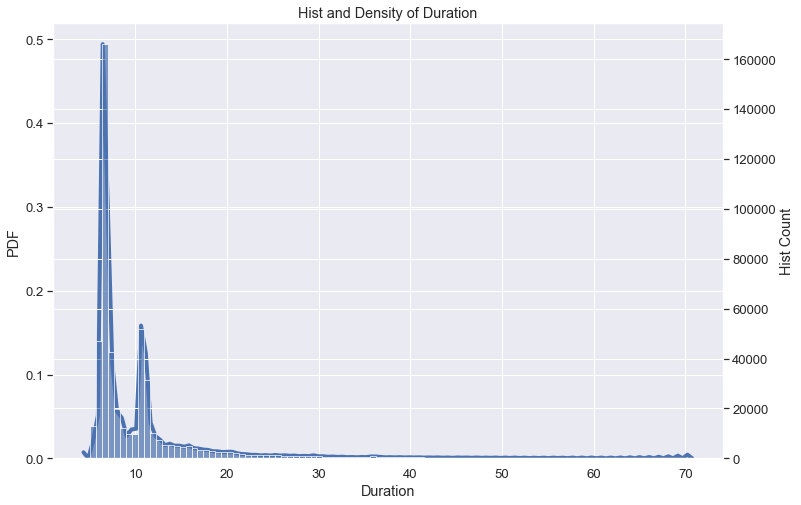

In [379]:
num_cols = [ 'Duration']       
plot_density_hist(df_dur_clean, num_cols, bins = 100, hist = True) 

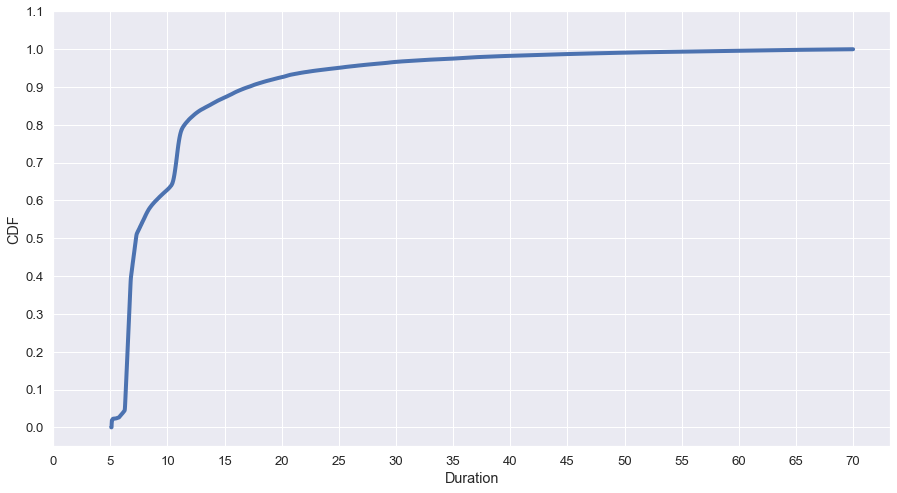

In [380]:
ax=cdf_plot(df_dur_clean, 'Duration')
ax.xaxis.set_ticks(np.arange(0, 75, 5));
ax.yaxis.set_ticks(np.arange(0, 1.2, 0.1));

In [173]:
df_dur_clean.Duration.describe()

count   511158.0000
mean        10.5003
std          7.7837
min          5.0820
25%          6.5760
50%          7.2480
75%         10.9710
max         69.9970
Name: Duration, dtype: float64

In [311]:
df.Duration.describe()

count   511785.0000
mean        18.1373
std        134.6335
min          5.0820
25%          6.5800
50%          7.2880
75%         11.0390
max      27784.7270
Name: Duration, dtype: float64

In [391]:
stats.percentileofscore(df_dur_clean['Duration'],10)

62.8899376577466

In [393]:
stats.percentileofscore(df_dur_clean['Duration'],15)

87.24243015358647

In [174]:
len(df.IMSI.unique())

6367

In [175]:
# remove IMSIs that appeared less than 10 times
df=df[df.groupby('IMSI').IMSI.transform(len) > 10]

In [176]:
len(df.IMSI.unique())

3476

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511785 entries, 0 to 521536
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IMSI               511785 non-null  float64       
 1   Start Time         511785 non-null  datetime64[ns]
 2   Duration           511785 non-null  float64       
 3   End Time           511785 non-null  datetime64[ns]
 4   Start Type         511785 non-null  object        
 5   End Type           511785 non-null  object        
 6   Final Disposition  511785 non-null  object        
 7   S1 Release Cause   511785 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 35.1+ MB


In [124]:
#hist of records per IMSI
#plt.hist(df[df.groupby('IMSI').IMSI.transform(len) > 100].IMSI.value_counts().values, bins=100)

In [178]:
def idle_time_calc(df):
    #remove fist value and shift down
    temp=df[['Start Time']].iloc[1:]
    #remove last value and shift up
    temp['End Time']=df['End Time'].iloc[0:-1].values
    temp['Idle Time']=temp['Start Time'] - temp['End Time']
    temp.reset_index(drop=True, inplace =True)
    temp=temp[['End Time', 'Start Time', 'Idle Time']]
    return(temp)    

In [179]:
df_list=[]
for imsi in df.IMSI.unique():
    temp=idle_time_calc(df[df.IMSI==imsi])
    df_list.append(temp) 

In [180]:
len(df_list)

3476

In [181]:
df2 = pd.concat(df_list)

In [182]:
df2.head()

,End Time,Start Time,Idle Time
0,2020-04-02 00:44:35,2020-04-02 00:46:30,00:01:55
1,2020-04-02 00:46:37,2020-04-02 00:47:32,00:00:55
2,2020-04-02 00:47:39,2020-04-02 01:16:31,00:28:52
3,2020-04-02 01:16:38,2020-04-02 01:57:19,00:40:41
4,2020-04-02 01:57:29,2020-04-02 01:58:01,00:00:32


In [183]:
df2.dtypes

End Time       datetime64[ns]
Start Time     datetime64[ns]
Idle Time     timedelta64[ns]
dtype: object

In [184]:
df2['Idle Time Sec']=df2['Idle Time'].dt.seconds.astype('float64')

In [185]:
df2.head()

,End Time,Start Time,Idle Time,Idle Time Sec
0,2020-04-02 00:44:35,2020-04-02 00:46:30,00:01:55,115.0000
1,2020-04-02 00:46:37,2020-04-02 00:47:32,00:00:55,55.0000
2,2020-04-02 00:47:39,2020-04-02 01:16:31,00:28:52,1732.0000
3,2020-04-02 01:16:38,2020-04-02 01:57:19,00:40:41,2441.0000
4,2020-04-02 01:57:29,2020-04-02 01:58:01,00:00:32,32.0000


In [401]:
df2[['Idle Time Sec']].describe()

,Idle Time Sec
count,508309.0000
mean,659.7489
std,3603.9208
min,0.0000
25%,5.0000
50%,27.0000
75%,197.0000
max,86399.0000


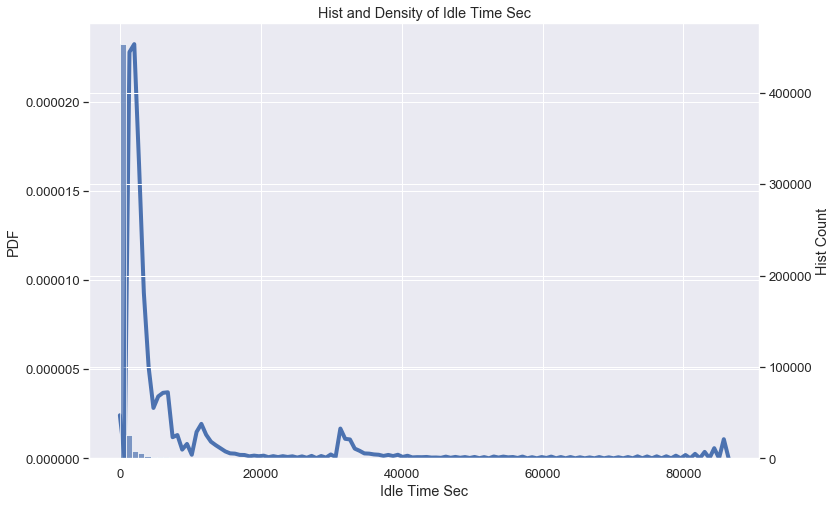

In [291]:
num_cols = [ 'Idle Time Sec']       
plot_density_hist(df2, num_cols, bins = 100, hist = True) 

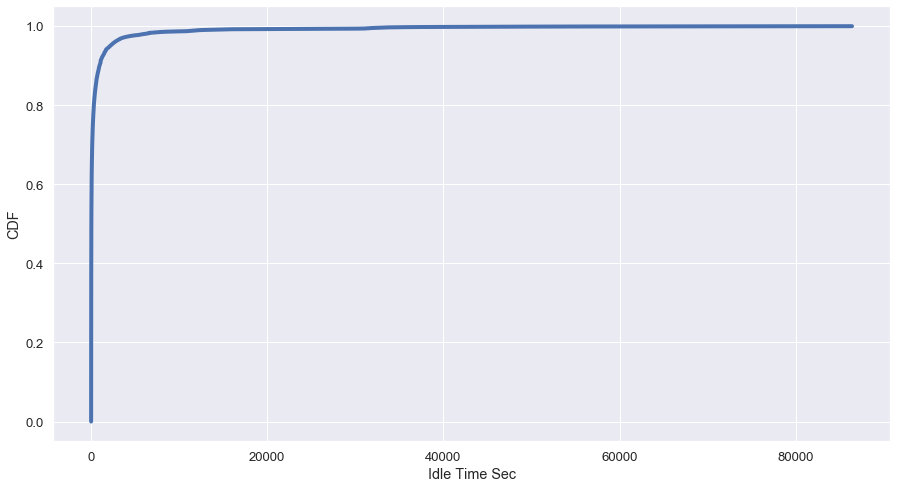

In [368]:
ax=cdf_plot(df2, 'Idle Time Sec')

In [370]:
#df3=remove_outlier(df2[['Idle Time Sec']])
#df4=drop_numerical_outliers(df2[['Idle Time Sec']])
df3=df2[df2['Idle Time Sec']<=300]

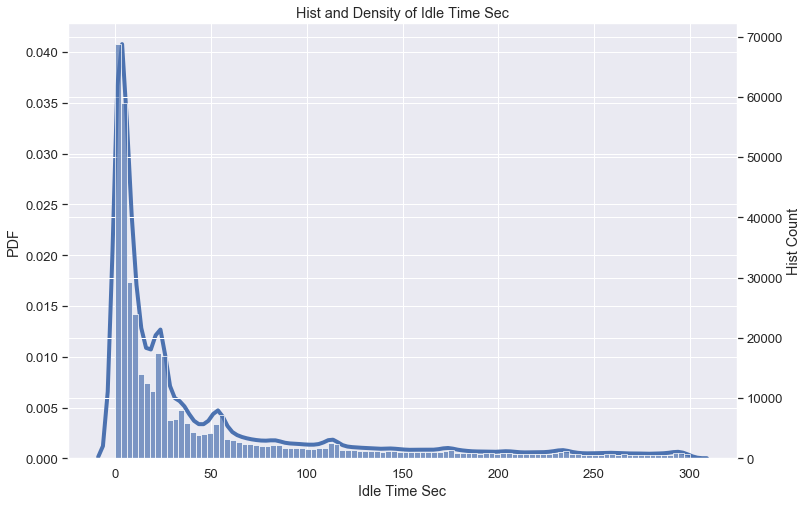

In [371]:
num_cols = [ 'Idle Time Sec']       
plot_density_hist(df3, num_cols, bins = 100, hist = True) 

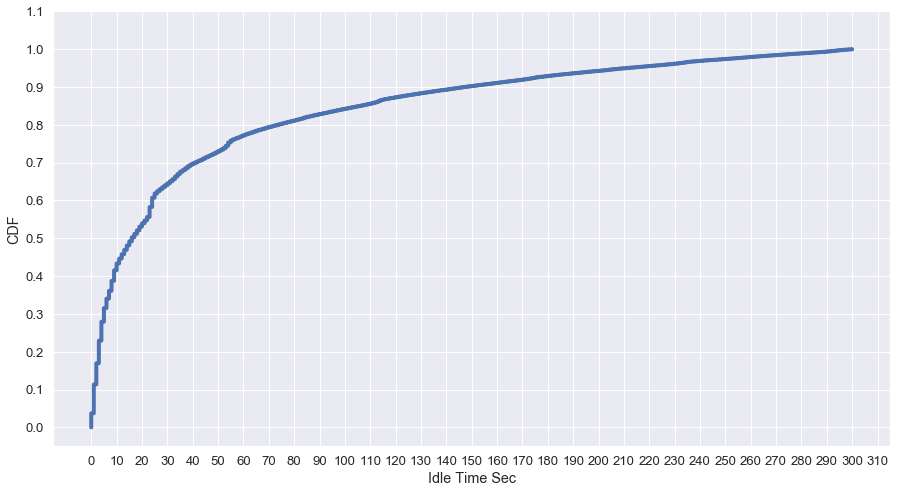

In [372]:
ax=cdf_plot(df3, 'Idle Time Sec' )
ax.xaxis.set_ticks(np.arange(0, 320, 10));
ax.yaxis.set_ticks(np.arange(0, 1.2, 0.1));

In [381]:
df2['Idle Time Sec'].describe()

count   508309.0000
mean       659.7489
std       3603.9208
min          0.0000
25%          5.0000
50%         27.0000
75%        197.0000
max      86399.0000
Name: Idle Time Sec, dtype: float64

In [398]:
df3[['Idle Time Sec']].describe()

,Idle Time Sec
count,405197.0000
mean,45.5419
std,66.5206
min,0.0000
25%,4.0000
50%,16.0000
75%,54.0000
max,300.0000


In [383]:
df3['Idle Time Sec'].quantile(0.50)

16.0

In [390]:
stats.percentileofscore(df3['Idle Time Sec'],10)

42.43664192972801

In [394]:
stats.percentileofscore(df3['Idle Time Sec'],5)

29.722826180845367

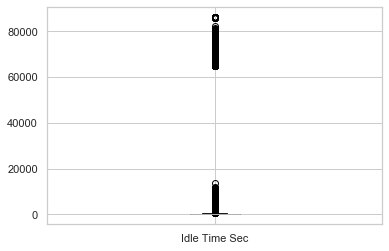

In [143]:
df2.boxplot(column=['Idle Time Sec'])

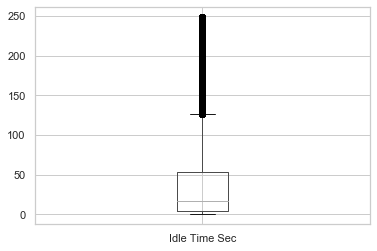

In [144]:
df3.boxplot(column=['Idle Time Sec'])

# Summary:

- I tried to approximate the idle time for IMSIs that had 10+ records in the sample. With a script doing little manipulation (IMSI agg, Start Type, End Type, Final Disposition) as shown in the first table below.

- If my method is close to reality, I see that about ~30% of connections come back within 5s and ~43% within10s, so we can save ~13% of UEs from having to request rrc again by going from 5s to 10s. 

    Idle Time Sec
    count  405197.0000
    mean	   45.5419
    std	       66.5206
    min	        0.0000
    25%	        4.0000
    50%	       16.0000
    75%	       54.0000
    max	      300.0000

    percentileofscore(5s): 30%
    percentileofscore(10s): 43%


- On the other hand, from the below for the same data sample, the connection duration shows that ~63% is below 5s and ~87% below 10s. So ~24% more UEs will be connected while inactive when we go from 5s to 10s, and from the above, only 30% of them will go back to active within 5s! So this is the trade off that would also involve user perceived experience in terms of battery consumption. 

    Conn Duration Sec
    count   511158.0000
    mean        10.5003
    std          7.7837
    min          5.0820
    25%          6.5760
    50%          7.2480
    75%         10.9710
    max         69.9970

    percentileofscore(5): 63% 
    percentileofscore(10): 87%  